<h1>Insurance Cost Prediction</h1>

<h2>Problem Statement:</h2>
Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

<h2>Insurance Cost Prediction need:</h2>
The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders. 

By implementing a machine learning model, insurers can:

- **Enhance Precision in Pricing**: Use individual data points to determine premiums that reflect actual risk more closely than generic estimates.
- **Increase Competitiveness**: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.
- **Improve Customer Satisfaction**: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.
- **Enable Personalized Offerings**: Create customized insurance packages based on predicted costs, which can cater more directly to the needs and preferences of individuals.
- **Risk Assessment**: Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly.
- **Policy Development**: The insights gained from the model can inform the development of new insurance products or adjustments to existing ones.
- **Strategic Decision Making**: Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.
- **Customer Engagement**: Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders.


<h2>Data description</h2>
The dataset comprises the following 11 attributes:

1.	Age: Numeric, ranging from 18 to 66 years.
2.	Diabetes: Binary (0 or 1), where 1 indicates the presence of diabetes.
3.	BloodPressureProblems: Binary (0 or 1), indicating the presence of blood pressure-related issues.
4.	AnyTransplants: Binary (0 or 1), where 1 indicates the person has had a transplant.
5.	AnyChronicDiseases: Binary (0 or 1), indicating the presence of any chronic diseases.
6.	Height: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
7.	Weight: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
8.	KnownAllergies: Binary (0 or 1), where 1 indicates known allergies.
9.	HistoryOfCancerInFamily: Binary (0 or 1), indicating a family history of cancer.
10.	NumberOfMajorSurgeries: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
11.	PremiumPrice: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000. Considering this as INR.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: C:\Users\Keerti Joshi\Documents\GitHub\MLOPS_scaler\Insurance-Cost-Prediction\insurance.csv

  0%|          | 0.00/30.8k [00:00<?, ?B/s]
100%|##########| 30.8k/30.8k [00:00<00:00, 616kB/s]


In [111]:
df = pd.read_csv('insurance.csv')

In [112]:
dataset = df.copy()

In [113]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [115]:
df.describe(include='all').T

count          mean          std      min      25%  \
Age                      986.0     41.745436    13.963371     18.0     30.0   
Diabetes                 986.0      0.419878     0.493789      0.0      0.0   
BloodPressureProblems    986.0      0.468560     0.499264      0.0      0.0   
AnyTransplants           986.0      0.055781     0.229615      0.0      0.0   
AnyChronicDiseases       986.0      0.180527     0.384821      0.0      0.0   
Height                   986.0    168.182556    10.098155    145.0    161.0   
Weight                   986.0     76.950304    14.265096     51.0     67.0   
KnownAllergies           986.0      0.215010     0.411038      0.0      0.0   
HistoryOfCancerInFamily  986.0      0.117647     0.322353      0.0      0.0   
NumberOfMajorSurgeries   986.0      0.667343     0.749205      0.0      0.0   
PremiumPrice             986.0  24336.713996  6248.184382  15000.0  21000.0   

                             50%      75%      max  
Age                         42.0     53.0     66.0  
Diabetes                     0.0      1.0      1.0  
BloodPressureProblems        0.0      1.0      1.0  
AnyTransplants               0.0      0.0      1.0  
AnyChronicDiseases           0.0      0.0      1.0  
Height                     168.0    176.0    188.0  
Weight                      75.0     87.0    132.0  
KnownAllergies               0.0      0.0      1.0  
HistoryOfCancerInFamily      0.0      0.0      1.0  
NumberOfMajorSurgeries       1.0      1.0      3.0  
PremiumPrice             23000.0  28000.0  40000.0

<h3>Insights:</h3>

- There are a total of 986 records and 11 features including the target feature in this insurance dataset.
- There are no null values in the whole dataset
- The datset has all integer type features
- Mean age of the individuals in the dataset is approximately 41, ranging from 18 to 66.
- Diabetes, BPProblems, Transplants, Chronic Diseases, Known Allergies, HistoryofCancerinFamily are Binary valued features with 0 as No and 1 as Yes.
- Height of people averages around 168 cm, ranging from 145cm to 188 cm.
- Weight of people averages around 77 kg, ranging from 51kg to 132 kg.
- Number of Major Surgeries has values 0,1,2,3 to specify how many surgeries the insurance buyer has undergone.
- Our Target variable, Premium Price varies from 15000 to 40000 INR in the given dataset with mean premium price of approximately 24000. 

In [116]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
#Converting Binary values features into categorical column for EDA.

df['Diabetes'] = df['Diabetes'].astype('object')
df['AnyTransplants'] = df['AnyTransplants'].astype('object')
df['BloodPressureProblems'] = df['BloodPressureProblems'].astype('object')
df['AnyChronicDiseases'] = df['AnyChronicDiseases'].astype('object')
df['KnownAllergies'] = df['KnownAllergies'].astype('object')
df['HistoryOfCancerInFamily'] = df['HistoryOfCancerInFamily'].astype('object')

In [119]:
df.describe(include='all').T

count  unique  top   freq          mean          std  \
Age                      986.0     NaN  NaN    NaN     41.745436    13.963371   
Diabetes                 986.0     2.0  0.0  572.0           NaN          NaN   
BloodPressureProblems    986.0     2.0  0.0  524.0           NaN          NaN   
AnyTransplants           986.0     2.0  0.0  931.0           NaN          NaN   
AnyChronicDiseases       986.0     2.0  0.0  808.0           NaN          NaN   
Height                   986.0     NaN  NaN    NaN    168.182556    10.098155   
Weight                   986.0     NaN  NaN    NaN     76.950304    14.265096   
KnownAllergies           986.0     2.0  0.0  774.0           NaN          NaN   
HistoryOfCancerInFamily  986.0     2.0  0.0  870.0           NaN          NaN   
NumberOfMajorSurgeries   986.0     NaN  NaN    NaN      0.667343     0.749205   
PremiumPrice             986.0     NaN  NaN    NaN  24336.713996  6248.184382   

                             min      25%      50%      75%      max  
Age                         18.0     30.0     42.0     53.0     66.0  
Diabetes                     NaN      NaN      NaN      NaN      NaN  
BloodPressureProblems        NaN      NaN      NaN      NaN      NaN  
AnyTransplants               NaN      NaN      NaN      NaN      NaN  
AnyChronicDiseases           NaN      NaN      NaN      NaN      NaN  
Height                     145.0    161.0    168.0    176.0    188.0  
Weight                      51.0     67.0     75.0     87.0    132.0  
KnownAllergies               NaN      NaN      NaN      NaN      NaN  
HistoryOfCancerInFamily      NaN      NaN      NaN      NaN      NaN  
NumberOfMajorSurgeries       0.0      0.0      1.0      1.0      3.0  
PremiumPrice             15000.0  21000.0  23000.0  28000.0  40000.0

In [120]:
#Adding a new feature BMI - Calculated as a combination of Height and Weight features

df['BMI'] = round(df['Weight']/ ((df['Height'] / 100 )**2),2)
df.head()

Age Diabetes BloodPressureProblems AnyTransplants AnyChronicDiseases  \
0   45        0                     0              0                  0   
1   60        1                     0              0                  0   
2   36        1                     1              0                  0   
3   52        1                     1              0                  1   
4   38        0                     0              0                  1   

   Height  Weight KnownAllergies HistoryOfCancerInFamily  \
0     155      57              0                       0   
1     180      73              0                       0   
2     158      59              0                       0   
3     183      93              0                       0   
4     166      88              0                       0   

   NumberOfMajorSurgeries  PremiumPrice    BMI  
0                       0         25000  23.73  
1                       0         29000  22.53  
2                       1         23000  23.63  
3                       2         28000  27.77  
4                       1         23000  31.93

In [121]:
df['BMI'].describe().T

count    986.000000
mean      27.460639
std        5.878789
min       15.160000
25%       23.395000
50%       27.155000
75%       30.760000
max       50.000000
Name: BMI, dtype: float64

In [122]:
df.isna().sum().sum()

np.int64(0)

In [123]:
#Categorizing BMI and Age groups into appropriate groups to better visualize the relationship with Premium Price. 

def bmi_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi < 24.9:
    return 'Normal weight'
  elif 24.9 <= bmi <= 29.9:
    return 'Overweight'
  elif 29.9 < bmi <= 34.9:
    return 'Obese class I'
  elif 34.9 < bmi <= 39.9:
    return 'Obese class II'
  elif bmi > 39.9:
      return 'Obese class III'

def age_category(age):
  if age <= 10:
    return '10 & below'
  elif 11 <= age <= 20:
    return '11-20'
  elif 21 <= age <= 30:
    return '21-30'
  elif 31 <= age <= 40:
    return '31-40'
  elif 41 <= age <= 50:
    return '41-50'
  elif 51 <= age <= 60:
    return '51-60'
  elif age > 60:
    return '60 & above'

In [124]:
df['bmi_category'] = df['BMI'].apply(bmi_category)
df['age_category'] = df['Age'].apply(age_category)

In [125]:
df.head()

Age Diabetes BloodPressureProblems AnyTransplants AnyChronicDiseases  \
0   45        0                     0              0                  0   
1   60        1                     0              0                  0   
2   36        1                     1              0                  0   
3   52        1                     1              0                  1   
4   38        0                     0              0                  1   

   Height  Weight KnownAllergies HistoryOfCancerInFamily  \
0     155      57              0                       0   
1     180      73              0                       0   
2     158      59              0                       0   
3     183      93              0                       0   
4     166      88              0                       0   

   NumberOfMajorSurgeries  PremiumPrice    BMI   bmi_category age_category  
0                       0         25000  23.73  Normal weight        41-50  
1                       0         29000  22.53  Normal weight        51-60  
2                       1         23000  23.63  Normal weight        31-40  
3                       2         28000  27.77     Overweight        51-60  
4                       1         23000  31.93  Obese class I        31-40

In [126]:
df['bmi_category'].value_counts()

bmi_category
Overweight         322
Normal weight      316
Obese class I      207
Obese class II      67
Underweight         38
Obese class III     36
Name: count, dtype: int64

<h3>Univariate Analysis</h3>

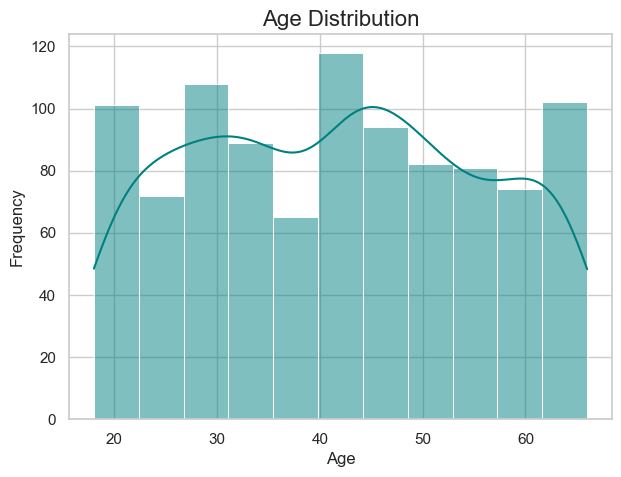

In [127]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Age'], kde=True, color='teal', linewidth=0.7)

# Set a title and axis labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.grid(True)

# Show the plot
plt.show()

<h3>Insights:</h3>
Age is spread out between 18 and 66, with slightly higher distribution in 30's, 40's and 60's. 

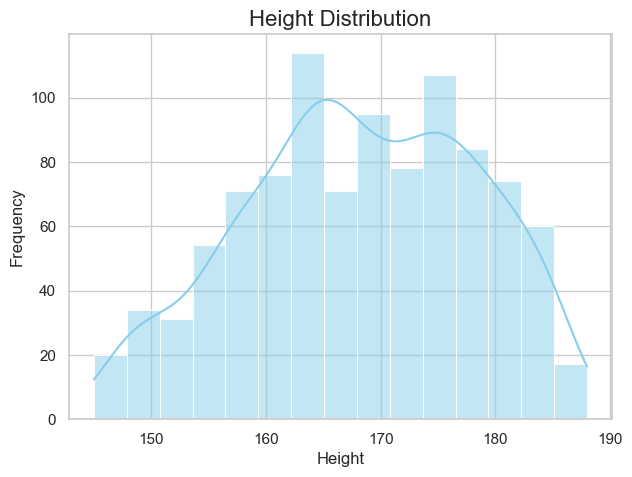

In [128]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Height'], kde=True, color='skyblue', linewidth=0.7)

# Set a title and axis labels
plt.title('Height Distribution', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

<h3>Insights:</h3>
Height distribution is slightly left skewed, spread out between 140 and 190, majority of people have height in the range 160-170cm.  

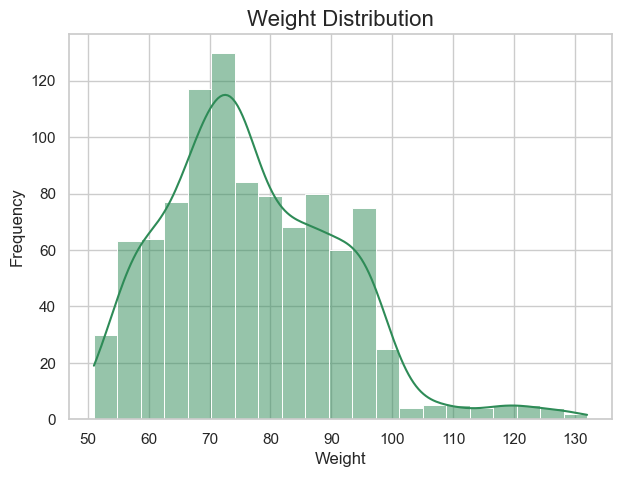

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Weight'], kde=True, color='seagreen', linewidth=0.7)

# Set a title and axis labels
plt.title('Weight Distribution', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

<h3>Insights:</h3>
Weight distribution is slightly right skewed with few outliers on the higher end, spread out between 50 and 130, majority of people have weight within 100, but few have more than 120kg, which means that there are valid outliers. According to the real world data, this weight is acceptabale in Obese category. 

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['BMI'], kde=True, color='blue', linewidth=0.7)

# Set a title and axis labels
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

<h3>Insights:</h3>
BMI distribution is slightly right skewed, spread out between 15 and 50, majority of people have BMI lesser than 30. 18.5 to 25 is an accepatable healthy range of BMI, anything above or below is considered underweight, overweight and obese.

<h3>Target variable - Premium Price Distribution</h3>

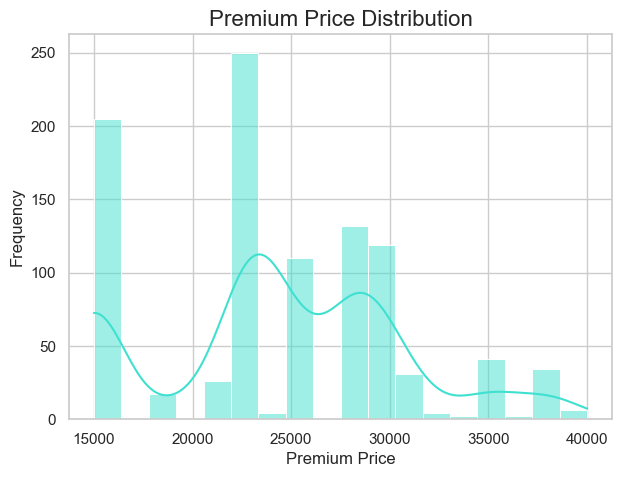

In [131]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['PremiumPrice'], kde=True, color='turquoise', linewidth=0.7)

# Set a title and axis labels
plt.title('Premium Price Distribution', fontsize=16)
plt.xlabel('Premium Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

<h3>Insights:</h3>
Premium Price ranges from 15000 to 40000, major group of people paying Premium price of around 21k, followed by 30k, and then 15k. 

In [132]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
sns.set_palette("muted")

# Age Distribution Boxplot
sns.boxplot(data=df, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Height Distribution Boxplot
sns.boxplot(data=df, x='Height', ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution', fontsize=14)
axes[0, 1].set_xlabel('Height (cm)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Weight Distribution Boxplot
sns.boxplot(data=df, x='Weight', ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution', fontsize=14)
axes[1, 0].set_xlabel('Weight (kg)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Weight Distribution Boxplot
sns.boxplot(data=df, x='BMI', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution', fontsize=14)
axes[1, 1].set_xlabel('BMI', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Premium Price Distribution Boxplot
sns.boxplot(data=df, x='PremiumPrice', ax=axes[2, 0])
axes[2, 0].set_title('Premium Price Distribution', fontsize=14)
axes[2, 0].set_xlabel('Premium Price', fontsize=12)
axes[2, 0].set_ylabel('Frequency', fontsize=12)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

<h3>Insights:</h3>
BMI, Weight, Premium Price features have outliers on the higher end. 

Data Distribution analysis with respect to several Health Conditions


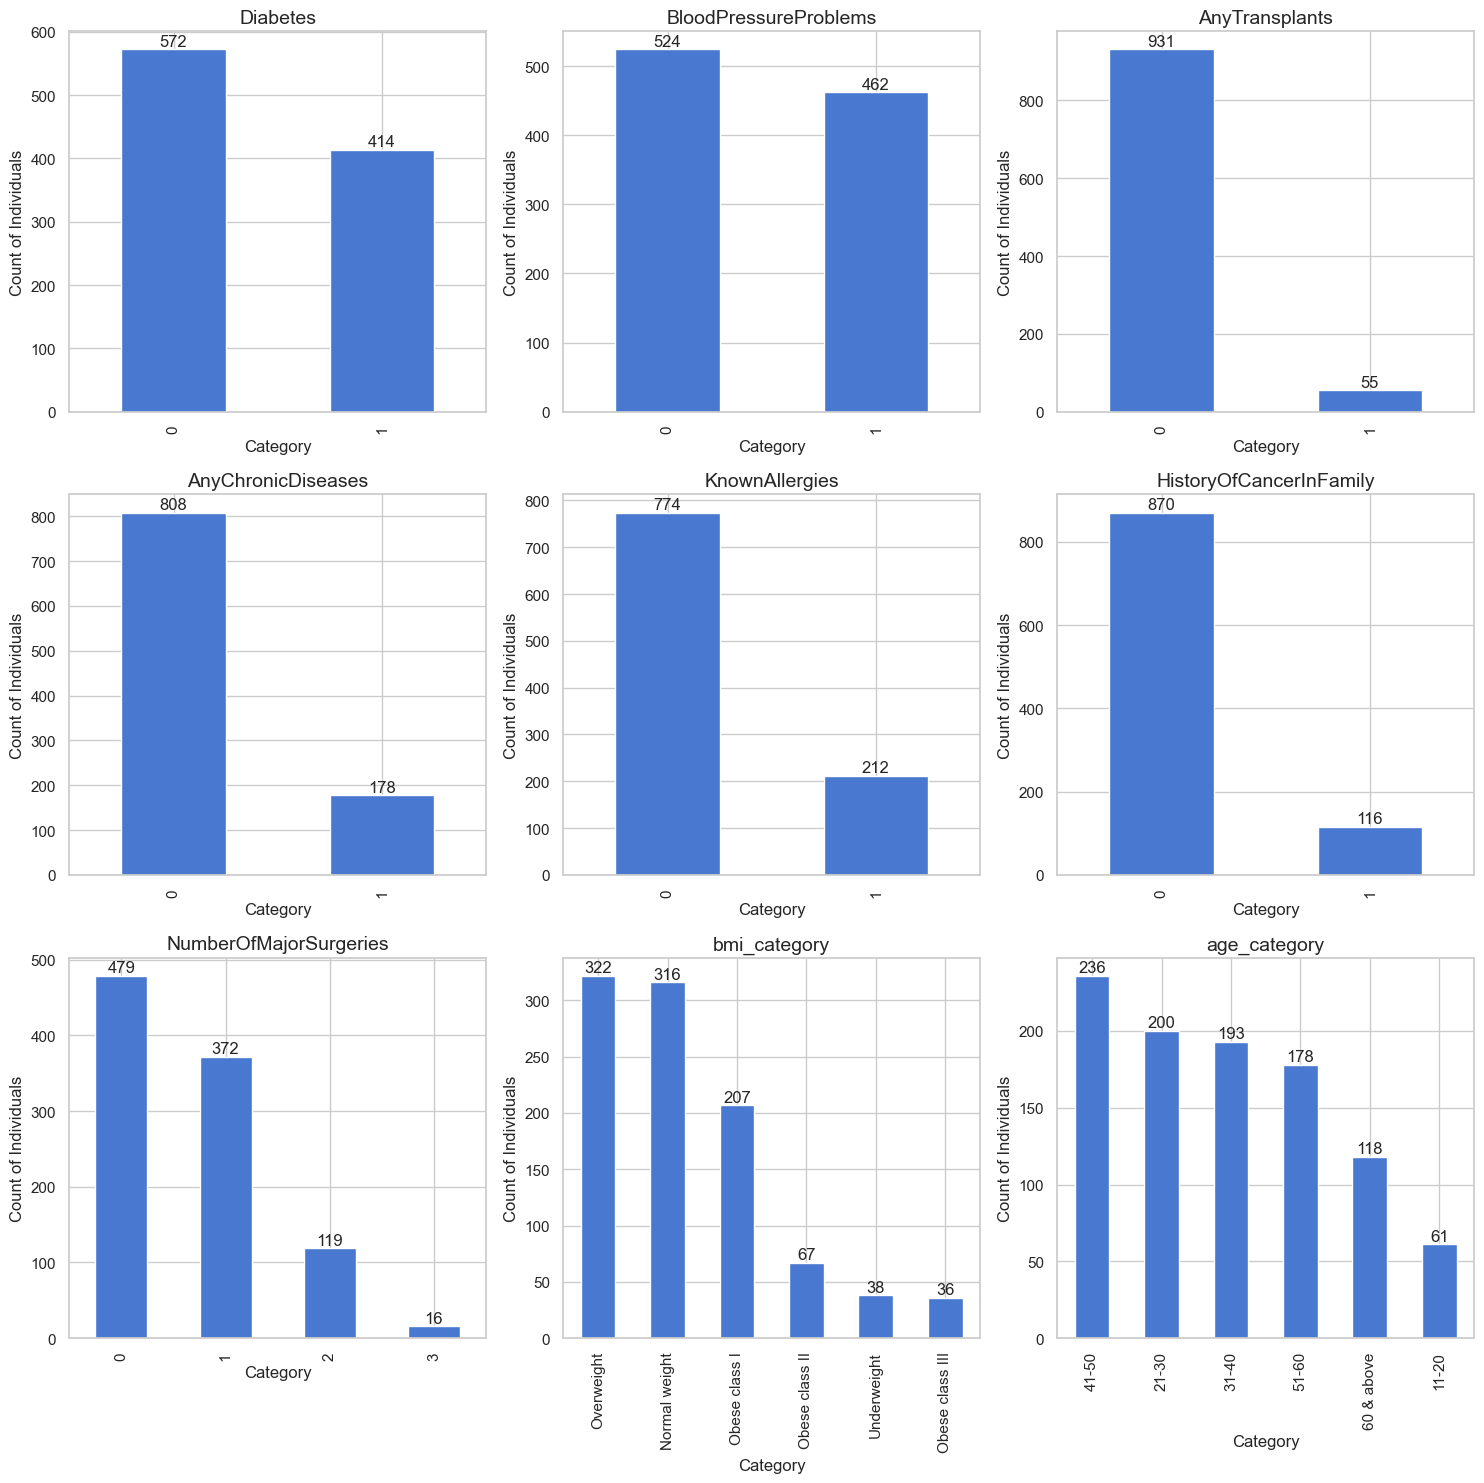

In [133]:
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'bmi_category', 'age_category']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Data distribution analysis
print('Data Distribution analysis with respect to several Health Conditions')

for i, cat in enumerate(cat_features):
    # Get the subplot's row and column index
    row, col = divmod(i, 3)
    
    # Sort data and get counts
    df_cat = df.sort_values(by=[cat])
    counts = df_cat[cat].value_counts()

    # Create the bar plot on the corresponding axis
    ax = axes[row, col]
    counts.plot(kind='bar', ax=ax)
    ax.set_title(cat, fontsize=14)
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Count of Individuals', fontsize=12)

    # Add count labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, str(int(height)), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

<h3>Insights:</h3>

- There are 572 individuals in the dataset who have Diabetes and 414 people who do not have Diabetes.
- There are 524 individuals in the dataset who have Blood Pressure problems and 462 people who do not have Blood Pressure Problems.
- 55 individuals in the dataset have Transplants and 931 people do not have any transplants.
- There are 178 people in the dataset who have Chronic diseases and 808 people who do not have any chronic disease.
- 212 people have Known allergies, 774 people do not have any known allergies.
- 116 of all the people have History of cancer in the family, while 870 of them do not have any cancer history in the family.
- A total of 479 people have had no surgeries, 372 people have had 1 surgery, 119 have had 2 surgeries and 16 of them have had 3 surgeries.
- Only 316 of all people are under Normal Weight category, rest of them are either overweight, underweight or Obese. Obese category also is further divided into 3 classes with obese class I being the highest in Obese distribution with 207 people.
- Most of the people buying insurance fall under 41-50 (236 people), followed by 21-30, 31-40, 51-60, 60 & above. Very few people (61) have bought insurance at the age under 20. 

<h3>Bivariate Analysis</h3>

In [134]:
#Grouping Premium price distribution by BMI category and Age category.

PremiumbyBMI = df.groupby(['bmi_category'])['PremiumPrice'].mean()
PremiumbyAge = df.groupby(['age_category'])['PremiumPrice'].mean()

In [135]:
plt.figure(figsize=(15, 5))

# Plot PremiumPrice by bmi_category
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=PremiumbyBMI.index, y=PremiumbyBMI.values, palette='viridis')
plt.title('Average PremiumPrice by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average PremiumPrice')

# Add value annotations on top of bars for BMI categories
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

# Plot PremiumPrice by age_category
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=PremiumbyAge.index, y=PremiumbyAge.values, palette='magma')
plt.title('Average PremiumPrice by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average PremiumPrice')

# Add value annotations on top of bars for Age categories
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

plt.tight_layout()

# Show plot
plt.show()

<h3>Insights:</h3>

- Premium Price is higher for Obese category people, followed by Overweight category.
- Premium Price increases as Age increases. 

In [136]:
#Grouping Premium price distribution by 'Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases',
#'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries' for EDA

Premiumbydiabetes = df.groupby(['Diabetes'])['PremiumPrice'].mean()
Premiumbybpproblem = df.groupby(['BloodPressureProblems'])['PremiumPrice'].mean()
Premiumbydiabetes = df.groupby(['Diabetes'])['PremiumPrice'].mean()
Premiumbybpproblem = df.groupby(['BloodPressureProblems'])['PremiumPrice'].mean()
Premiumbyanytrans = df.groupby(['AnyTransplants'])['PremiumPrice'].mean()
Premiumbyanychronic = df.groupby(['AnyChronicDiseases'])['PremiumPrice'].mean()
Premiumbyknownallergies = df.groupby(['KnownAllergies'])['PremiumPrice'].mean()
Premiumbyfamcancerhistory = df.groupby(['HistoryOfCancerInFamily'])['PremiumPrice'].mean()
Premiumbysurgeries = df.groupby(['NumberOfMajorSurgeries'])['PremiumPrice'].mean()

In [137]:
plt.figure(figsize=(20, 15))

# Define the categories and their corresponding groupings
groupings = {
    'Diabetes': Premiumbydiabetes,
    'Blood Pressure Problems': Premiumbybpproblem,
    'Any Transplants': Premiumbyanytrans,
    'Any Chronic Diseases': Premiumbyanychronic,
    'Known Allergies': Premiumbyknownallergies,
    'Family History of Cancer': Premiumbyfamcancerhistory,
    'Number of Major Surgeries': Premiumbysurgeries
}

# Loop through the groupings and plot each one
for i, (category, premium_data) in enumerate(groupings.items(), 1):
    plt.subplot(3, 3, i)

    # Create the bar plot
    ax = sns.barplot(x=premium_data.index, y=premium_data.values, palette='coolwarm')
    plt.title(f'Average PremiumPrice by {category}')
    plt.xlabel(category)
    plt.ylabel('Average PremiumPrice')

    # Add value annotations on top of the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

<h3>Insights:</h3>

- Premium Price is evidently greater for people having known health conditions than people who do not have health conditions.
- As the number of surgeries people have had increases, Premium Price also increases. 

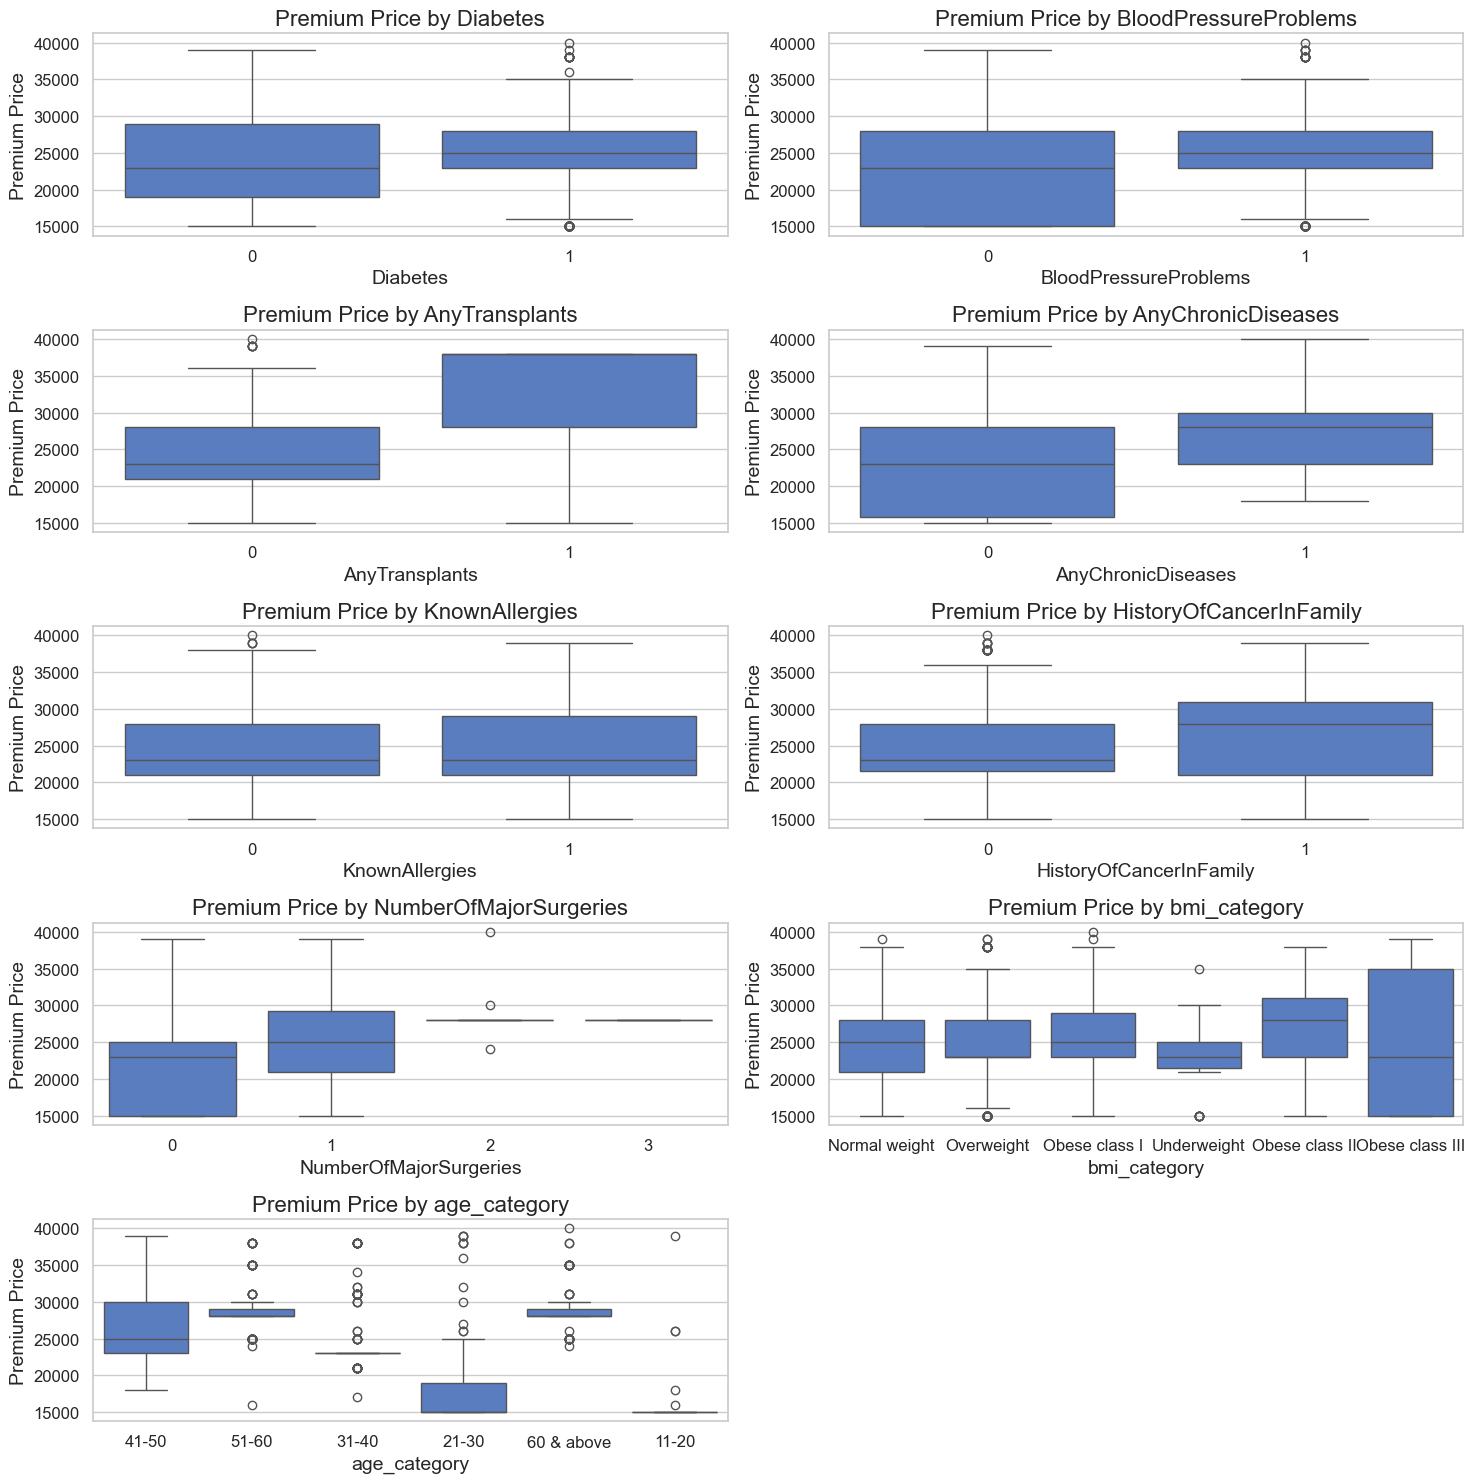

In [138]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15)) 
axes = axes.flatten()
sns.set_palette("muted")

# Loop over columns to create boxplots
for i, column in enumerate(cat_features):
    ax = sns.boxplot(data=df, x=column, y="PremiumPrice", ax=axes[i])
    
    ax.set_title(f'Premium Price by {column}', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Premium Price', fontsize=14)   
    ax.tick_params(axis='both', which='major', labelsize=12)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<h3>Multivariate Analysis</h3>

In [139]:
#Pairplots
sns.pairplot(df, hue='age_category')

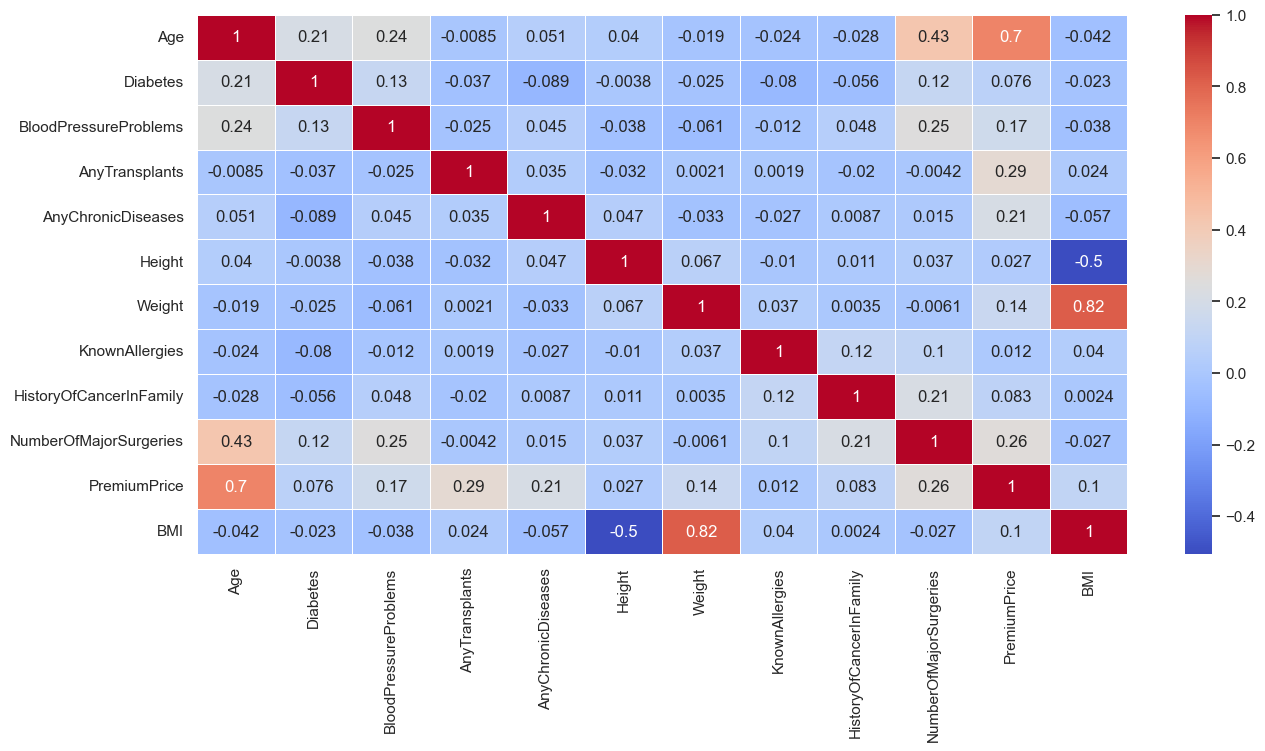

In [140]:
df_corr = df.drop(['bmi_category', 'age_category'], axis=1)

plt.figure(figsize=(15,7))
sns.heatmap(df_corr.corr(),annot=True, cmap = 'coolwarm', linewidth=.5)
plt.show()

<h3>Insights:</h3>

- Age and Premium price are highly positively correlated (0.7)
- Weight and BMI are correlated (0.82)
- Age and Number of Surgeries are positively correlated. (0.43)
- Premium price is also positively correlated with Transplants, Chronic diseases and Number of major surgeries.

<h2>Hypothesis Testing</h2>

<h3>T-Test</h3>

Null Hypothesis (H0): Health condition has no effect the Premium Price

Alternative Hypothesis (H1): Health condition affects the Premium Price

In [141]:
import scipy.stats as stats

def hypothesis_testing(df, conditions, target_variable='PremiumPrice', alpha=0.05):
    """
    Performs hypothesis testing (two-sample t-test) for each binary condition in the provided list.
    
    Parameters:
        df (DataFrame): The dataset containing the binary conditions and target variable.
        conditions (list): List of column names representing binary conditions.
        target_variable (str): The target variable to compare across the binary groups (default is 'PremiumPrice').
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing the t-statistics, p-values, and conclusions for each condition.
    """
    results = {}
    
    for condition in conditions:
        # Extract the two groups based on the binary condition (1 and 0)
        group_1 = df[df[condition] == 1][target_variable]
        group_0 = df[df[condition] == 0][target_variable]
        
        # Perform two-sample t-test
        t_stat, p_value = stats.ttest_ind(group_1, group_0, equal_var=False)
        
        # Determine the conclusion based on the p-value and alpha
        if p_value < alpha:
            conclusion = f"Reject the null hypothesis: {condition} affects the {target_variable}."
        else:
            conclusion = f"Fail to reject the null hypothesis: No significant effect of {condition} on {target_variable}."
        
        # Store the results
        results[condition] = {
            'T-statistic': t_stat,
            'P-value': p_value,
            'Conclusion': conclusion
        }
        
    return results


conditions_to_test = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                      'KnownAllergies', 'HistoryOfCancerInFamily']

test_results = hypothesis_testing(df, conditions_to_test)

# Display results
for condition, result in test_results.items():
    print(f"\nResults for {condition}:")
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('----'*30)



Results for Diabetes:
T-statistic: 2.4489285982890396
P-value: 0.014508142994631809
Conclusion: Reject the null hypothesis: Diabetes affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for BloodPressureProblems:
T-statistic: 5.370281271166068
P-value: 9.813498313247295e-08
Conclusion: Reject the null hypothesis: BloodPressureProblems affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for AnyTransplants:
T-statistic: 6.2599390386040215
P-value: 5.544902737541748e-08
Conclusion: Reject the null hypothesis: AnyTransplants affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for AnyChronicDiseases:
T-statistic: 7.707663368460665
P-value: 1.7279736467737666e-13
Conclusion: Reject the

<h3>ANOVA Test</h3>

In [142]:
import scipy.stats as stats

def anova_hypothesis_testing(df, categorical_columns, target_variable='PremiumPrice', alpha=0.05):
    """
    Performs One-Way ANOVA hypothesis testing for categorical feature with 3+ values in the provided list.
    
    Parameters:
        df (DataFrame): The dataset containing the categorical features and target variable.
        categorical_columns (list): List of categorical column names to test.
        target_variable (str): The target variable to compare across the categories (default is 'PremiumPrice').
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing the F-statistics, p-values, and conclusions for each condition.
    """
    results = {}
    
    for column in categorical_columns:
        # Group the data by the categorical feature and extract the target variable values for each group
        groups = [df[df[column] == category][target_variable].values for category in df[column].unique()]
        
        # Perform One-Way ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Determine the conclusion based on the p-value and alpha
        if p_value < alpha:
            conclusion = f"Reject the null hypothesis: {column} affects the {target_variable}."
        else:
            conclusion = f"Fail to reject the null hypothesis: No significant effect of {column} on {target_variable}."
        
        # Store the results
        results[column] = {
            'F-statistic': f_stat,
            'P-value': p_value,
            'Conclusion': conclusion
        }
        
    return results

# Example usage:
categorical_columns_to_test = ['NumberOfMajorSurgeries', 'bmi_category', 'age_category'] 

# Call the function
anova_results = anova_hypothesis_testing(df, categorical_columns_to_test)

# Display results
for column, result in anova_results.items():
    print(f"\nResults for {column}:")
    print(f"F-statistic: {result['F-statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('----'*30)



Results for NumberOfMajorSurgeries:
F-statistic: 26.13539359740762
P-value: 2.8711631377228097e-16
Conclusion: Reject the null hypothesis: NumberOfMajorSurgeries affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for bmi_category:
F-statistic: 3.382368924763308
P-value: 0.004909184470670699
Conclusion: Reject the null hypothesis: bmi_category affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for age_category:
F-statistic: 236.58752890662143
P-value: 1.1233378593947144e-165
Conclusion: Reject the null hypothesis: age_category affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------


<h3>Chi-Square Test</h3>

Null Hypothesis (H₀): There is no association between the two health conditions (e.g., presence of chronic disease and family history of cancer).

Alternative Hypothesis (H₁): There is an association between the two health conditions.

In [143]:
from scipy.stats import chi2_contingency

def chi_square_test(df, health_conditions, alpha=0.05):
    """
    Performs Chi-Square test of independence for all pairs of binary health conditions.
    
    Parameters:
        df (DataFrame): The dataset containing the health conditions.
        health_conditions (list): List of health condition column names (binary variables).
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing Chi-Square statistics, p-values, and conclusions for each condition pair.
    """
    results = {}
    
    # Loop through all pairs of conditions
    for i in range(len(health_conditions)):
        for j in range(i + 1, len(health_conditions)):
            condition_1 = health_conditions[i]
            condition_2 = health_conditions[j]
            
            contingency_table = pd.crosstab(df[condition_1], df[condition_2])
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            if p_value < alpha:
                conclusion = f"Reject the null hypothesis: There is an association between {condition_1} and {condition_2}."
            else:
                conclusion = f"Fail to reject the null hypothesis: No significant association between {condition_1} and {condition_2}."
            
            results[(condition_1, condition_2)] = {
                'Chi-square statistic': chi2_stat,
                'P-value': p_value,
                'Degrees of freedom': dof,
                'Expected frequencies': expected,
                'Conclusion': conclusion
            }
    
    return results

health_conditions_to_test = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 
                             'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'bmi_category', 'age_category']

# Call the function
chi_square_results = chi_square_test(df, health_conditions_to_test)

# Display results
for (condition_1, condition_2), result in chi_square_results.items():
    print(f"\nResults for {condition_1} and {condition_2}:")
    print(f"Chi-square statistic: {result['Chi-square statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of freedom: {result['Degrees of freedom']}")
    print(f"Expected frequencies: \n{result['Expected frequencies']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('---'*45)



Results for Diabetes and BloodPressureProblems:
Chi-square statistic: 15.571225392078397
P-value: 7.945461025980538e-05
Degrees of freedom: 1
Expected frequencies: 
[[303.98377282 268.01622718]
 [220.01622718 193.98377282]]
Conclusion: Reject the null hypothesis: There is an association between Diabetes and BloodPressureProblems.
---------------------------------------------------------------------------------------------------------------------------------------

Results for Diabetes and AnyTransplants:
Chi-square statistic: 1.0207290599382488
P-value: 0.3123461364949182
Degrees of freedom: 1
Expected frequencies: 
[[540.09330629  31.90669371]
 [390.90669371  23.09330629]]
Conclusion: Fail to reject the null hypothesis: No significant association between Diabetes and AnyTransplants.
---------------------------------------------------------------------------------------------------------------------------------------

Results for Diabetes and AnyChronicDiseases:
Chi-square statistic: 

<h4>Outlier Detection and Handling</h4>

In [144]:
numcols = ['Age', 'Height', 'Weight', 'BMI', 'PremiumPrice']

def iqr_outlier_detection(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]


outliers_info = []

for column in numcols:
    outlier_count = iqr_outlier_detection(df, column)
    outliers_info.append({
        'Column': column,
        'Outliers_IQR': outlier_count
    })

outliers_info_df = pd.DataFrame(outliers_info)

print("Number of outliers using IQR method:")
print(outliers_info_df)

Number of outliers using IQR method:
         Column  Outliers_IQR
0           Age             0
1        Height             0
2        Weight            16
3           BMI            22
4  PremiumPrice             6


<h3>Insights:</h3>
There are 16 outliers in weight, 6 outliers in Premium Price and 22 outliers in BMI. But considering the real world data, these values are actually very much possible. So, keeping the data as it is for our prediction. 

In [145]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'bmi_category', 'age_category'],
      dtype='object')

In [146]:
data = df.copy()

In [147]:
print(data.isna().sum().sum())

0


Dropping BMI, BMIcategory since we have Height and Weight features which are correlated. Dropping AgeCategory as we have Age feature. Dropping KnownAllergies Category since it does no have any affect on Premium Price (Target Variable)

In [148]:
data.drop(['BMI', 'bmi_category', 'age_category', 'KnownAllergies'], axis=1,inplace=True)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   HistoryOfCancerInFamily  986 non-null    object
 8   NumberOfMajorSurgeries   986 non-null    int64 
 9   PremiumPrice             986 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.2+ KB


In [150]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

def performance_metrics(y_true, y_pred, d, metrics=['R2', 'Adjusted R2', 'MSE', 'RMSE', 'MAPE']):
    """
    Calculate and return various performance metrics for regression models.
    Parameters:
        y_true: True values, y_pred: Predicted values.
        d (int): The number of features in the model (for adjusted R²).
        metrics (list): List of metrics to compute. Defaults to ['R2', 'Adjusted R2', 'MSE', 'RMSE', 'MAPE'].
    Returns:
        dict: A dictionary containing the computed performance metrics.
    """
    performance = {}

    # Calculate R²
    if 'R2' in metrics:
        r2 = r2_score(y_true, y_pred)
        performance["R2"] = float(round(r2, 2))
    
    # Calculate Adjusted R²
    if 'Adjusted R2' in metrics:
        r2 = r2_score(y_true, y_pred)
        n = len(y_true)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - d - 1)
        performance["Adjusted R2"] = float(round(adj_r2, 2))

    # Calculate MSE
    if 'MSE' in metrics:
        mse = mean_squared_error(y_true, y_pred)
        performance["Mean Squared Error"] = float(round(mse, 2))

    # Calculate RMSE
    if 'RMSE' in metrics:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        performance["Root Mean Squared Error"] = float(round(rmse, 2))

    # Calculate MAPE
    if 'MAPE' in metrics:
        mape = mean_absolute_percentage_error(y_true, y_pred)
        performance["Mean Absolute Percentage Error"] = float(round(mape, 2))

    return performance


<h4>Separating the Target Variable and Independant Features</h4>

In [151]:
dataset.drop(['KnownAllergies'], axis=1, inplace=True)
dataset.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0     155      57                        0                       0   
1     180      73                        0                       0   
2     158      59                        0                       1   
3     183      93                        0                       2   
4     166      88                        0                       1   

   PremiumPrice  
0         25000  
1         29000  
2         23000  
3         28000  
4         23000

In [152]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   HistoryOfCancerInFamily  986 non-null    int64
 8   NumberOfMajorSurgeries   986 non-null    int64
 9   PremiumPrice             986 non-null    int64
dtypes: int64(10)
memory usage: 77.2 KB


In [153]:
Y = dataset['PremiumPrice']
X = dataset.drop(['PremiumPrice'],axis=1)

X.shape, Y.shape

((986, 9), (986,))

In [154]:
X.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  HistoryOfCancerInFamily  NumberOfMajorSurgeries  
0     155      57                        0                       0  
1     180      73                        0                       0  
2     158      59                        0                       1  
3     183      93                        0                       2  
4     166      88                        0                       1

In [155]:
Y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

<h3>Train-Test Split</h3>

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

In [157]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((788, 9), (198, 9), (788,), (198,))

<h3>Scaling the features</h3>

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()

In [160]:
# Fit the scaler on the training data and transform the training set
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the already fitted scaler
x_test_scaled = scaler.transform(x_test)

In [161]:
import pickle

with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

<h3>Model Creation</h3>

<h4>Linear Regression</h4>

In [162]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [163]:
models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=1.0)] 
          ]

In [164]:
for name,model in models:
    model.fit(x_train_scaled, y_train.values)
    predictions = model.predict(x_test_scaled)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('Coefficients: ', model.coef_)
    print("Training score", model.score(x_train_scaled, y_train))
    print("Testing Score", model.score(x_test_scaled, y_test))
    print('---'*45)

Linear Regression : 3851.0369352742905
Coefficients:  [4667.30435931 -199.20550865   89.97640502 1755.02992603  935.36051078
  -19.66629047 1034.36797202  854.4350187  -510.14078095]
Training score 0.6491607645357585
Testing Score 0.6084656916704365
---------------------------------------------------------------------------------------------------------------------------------------
Lasso Regression : 3851.0366650241613
Coefficients:  [4667.10466467 -199.09707922   89.8566602  1754.92965263  935.27594721
  -19.55364733 1034.24710624  854.30117767 -509.91341937]
Training score 0.6491607614806505
Testing Score 0.6084657466230092
---------------------------------------------------------------------------------------------------------------------------------------
Ridge Regression : 3850.678310253836
Coefficients:  [4659.13064372 -198.18761097   90.46947849 1752.87483748  934.59104534
  -19.05051168 1032.74214374  852.44367026 -505.81323791]
Training score 0.6491592026168835
Testing Score 

In [165]:
lrmodel = LinearRegression()
lrmodel.fit(x_train_scaled, y_train)

LinearRegression()

In [166]:
print("Linear Regression Model Performance on Training Data -->")
performance_metrics(y_train, lrmodel.predict(x_train_scaled), x_train_scaled.shape[1])

Linear Regression Model Performance on Training Data -->


{'R2': 0.65,
 'Adjusted R2': 0.65,
 'Mean Squared Error': 13771841.22,
 'Root Mean Squared Error': 3711.04,
 'Mean Absolute Percentage Error': 0.11}

In [167]:
print("Linear Regression Model Performance on Test Data -->")
performance_metrics(y_test, lrmodel.predict(x_test_scaled), x_test_scaled.shape[1])

Linear Regression Model Performance on Test Data -->


{'R2': 0.61,
 'Adjusted R2': 0.59,
 'Mean Squared Error': 14830485.48,
 'Root Mean Squared Error': 3851.04,
 'Mean Absolute Percentage Error': 0.11}

<h3>Insights:</h3>

- The model has a decent fit with 61% of the variance explained, but there iss still notable error, especially when considering the high MSE and RMSE values.
- The low MAPE indicates that, relatively speaking, the model performs reasonably well, with predictions typically being 11% off from the actual values.

In [168]:
y_pred_lrmodel = lrmodel.predict(x_test_scaled)

<h4>Polynomial Features modeling</h4>

In [169]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
linreg_poly = LinearRegression()
linreg_poly.fit(x_train_poly, y_train)


LinearRegression()

In [170]:
print("Polynomial Model Training Performance -->")
performance_metrics(y_train, linreg_poly.predict(x_train_poly), x_train_poly.shape[1])

Polynomial Model Training Performance -->


{'R2': 0.74,
 'Adjusted R2': 0.72,
 'Mean Squared Error': 10401540.98,
 'Root Mean Squared Error': 3225.14,
 'Mean Absolute Percentage Error': 0.1}

In [171]:
print("Polynomial Model Test Performance -->")
performance_metrics(y_test, linreg_poly.predict(x_test_poly), x_test_poly.shape[1])

Polynomial Model Test Performance -->


{'R2': 0.68,
 'Adjusted R2': 0.56,
 'Mean Squared Error': 12136519.11,
 'Root Mean Squared Error': 3483.75,
 'Mean Absolute Percentage Error': 0.09}

<h3>Insights:</h3>

- The polynomial model performs better than the linear regression model across all key metrics (R², MSE, RMSE, and MAPE).
- It explains more variance in the data (68% vs. 61%), produces lower prediction errors, and achieves better relative accuracy (MAPE of 9% vs. 11%).
- The slightly lower adjusted R² suggests that adding polynomial features has improved the fit, but there may be a risk of overfitting, especially if the polynomial degree is too high.

In [172]:
y_pred_polylrmodel = linreg_poly.predict(x_test_poly)

<h3>Linear Regression - Checking Assumptions</h3>

<h4>Multi-collinearity - Variance Inflation Factor</h4>

In [173]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
def calculate_vif(X_scaled):
    # Calculate VIF for each feature in the scaled data
    vif_data = pd.DataFrame()
    x_vif = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    vif_data['Features'] = x_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

    vif_data['VIF'] = vif_data['VIF'].round(2)
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_data

vif_result = calculate_vif(x_train_scaled)
print(vif_result)


                  Features   VIF
0   NumberOfMajorSurgeries  1.36
1                      Age  1.31
2    BloodPressureProblems  1.11
3  HistoryOfCancerInFamily  1.07
4                 Diabetes  1.07
5                   Height  1.02
6       AnyChronicDiseases  1.02
7                   Weight  1.01
8           AnyTransplants  1.00


<h3>Insights:</h3>
VIF values are <5, which means there are no multi-collinear columns present. 

<h4>Mean of Residuals</h4>

In [175]:
y_test_pred = lrmodel.predict(x_test_scaled)
residuals = y_test - y_test_pred
print("Mean of Residuals : ", residuals.mean())

Mean of Residuals :  597.0333533905208


In [176]:
# Plot KDE of residuals
sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.title("Kernel Density Estimate of Residuals")
plt.show()

In [177]:
from scipy import stats
res_shapiro = stats.shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {res_shapiro.statistic}")
print(f"P-value: {res_shapiro.pvalue}")

alpha = 0.05  # significance level

if res_shapiro.pvalue > alpha:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")
else:
    print("Reject the null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9109076837835491
P-value: 1.5200911573910867e-09
Reject the null hypothesis: Residuals are not normally distributed.


<h4>Independence of Errors</h4>

In [178]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test on the residuals
dw_statistic = durbin_watson(residuals)

# Print the result
print(f"Durbin-Watson Statistic: {dw_statistic}")

# Interpretation of Durbin-Watson Statistic
if dw_statistic == 2:
    print("No autocorrelation in residuals (independence of errors).")
elif dw_statistic < 2:
    print("Positive autocorrelation in residuals (errors are not independent).")
else:
    print("Negative autocorrelation in residuals (errors are not independent).")


Durbin-Watson Statistic: 2.174948005506086
Negative autocorrelation in residuals (errors are not independent).


<h4>Heteroskedasticity</h4>

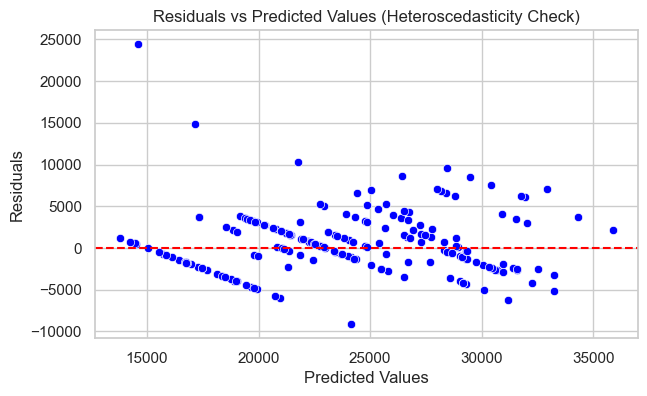

In [179]:
# Plot residuals vs predicted values
plt.figure(figsize=(7, 4))
sns.scatterplot(x=y_test_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Heteroscedasticity Check)")
plt.show()

<h3>Using Statsmodel library</h3>

In [180]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Fit the regression model
x_stat = sm.add_constant(x_train_scaled) 
model_stat = sm.OLS(y_train, x_stat).fit()

# Perform Goldfeld-Quandt test
gq_statistic, p_value, _ = het_goldfeldquandt(model_stat.resid, model_stat.model.exog)

print(f"Goldfeld-Quandt Test Statistic: {gq_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")

Goldfeld-Quandt Test Statistic: 1.3364390962502553
P-value: 0.0022934733139495455
Reject the null hypothesis: Evidence of heteroscedasticity.


<h3>Decision Tree Regressor</h3>

In [181]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train) # Since Decision Trees do not require feature scaling, using non-scaled x for train and test.
y_pred_dt = dt_regressor.predict(x_test)

In [182]:
print("Decision Tree Regressor Model Training Performance -->")
performance_metrics(y_train, dt_regressor.predict(x_train), x_train.shape[1])

Decision Tree Regressor Model Training Performance -->


{'R2': 1.0,
 'Adjusted R2': 1.0,
 'Mean Squared Error': 0.0,
 'Root Mean Squared Error': 0.0,
 'Mean Absolute Percentage Error': 0.0}

In [183]:
print("Decision Tree Regressor Model Test Performance -->")
performance_metrics(y_test, dt_regressor.predict(x_test), x_test.shape[1])

Decision Tree Regressor Model Test Performance -->


{'R2': 0.69,
 'Adjusted R2': 0.68,
 'Mean Squared Error': 11747474.75,
 'Root Mean Squared Error': 3427.46,
 'Mean Absolute Percentage Error': 0.04}

In [184]:
y_test_pred = dt_regressor.predict(x_test)
residuals = y_test - y_test_pred
print("Mean of Residuals : ", residuals.mean())

Mean of Residuals :  -30.303030303030305


<h4>Finding the best hyperparameters for Decision Tree Regressor model</h4>

In [185]:
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree Regressor
dtr_cv = DecisionTreeRegressor(random_state=32)

# Define the parameter grid with hyperparameters
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'splitter': ['best', 'random'],  
    'min_impurity_decrease': [0.0, 0.1, 0.2], 
    'max_leaf_nodes': [None, 10, 20, 30],  
}

# Set up GridSearchCV with cross-validation and negative MSE as scoring metric
grid_search = GridSearchCV(estimator=dtr_cv, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from the grid search
dt_best = grid_search.best_estimator_


Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
Best parameters found:  {'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'best'}


In [186]:
print("Tuned Decision Tree Regressor Model Training Performance -->")
performance_metrics(y_train, dt_best.predict(x_train), x_train.shape[1])

Tuned Decision Tree Regressor Model Training Performance -->


{'R2': 0.86,
 'Adjusted R2': 0.86,
 'Mean Squared Error': 5457694.77,
 'Root Mean Squared Error': 2336.17,
 'Mean Absolute Percentage Error': 0.03}

In [187]:
print("Tuned Decision Tree Regressor Model Test Performance -->")
performance_metrics(y_test, dt_best.predict(x_test), x_test.shape[1])

Tuned Decision Tree Regressor Model Test Performance -->


{'R2': 0.78,
 'Adjusted R2': 0.77,
 'Mean Squared Error': 8271926.85,
 'Root Mean Squared Error': 2876.1,
 'Mean Absolute Percentage Error': 0.04}

<h3>Insights:</h3>

- The model explains 78% of the variance in the test data, which is slightly lower than the training R² (86%).
- The MSE on the test data is higher than on the training data, indicating that the model's predictions are slightly less accurate on new, unseen data. However, the magnitude of error is still relatively low.
- The MAPE of 4% on the test data shows a good level of relative error.


In [188]:
y_test_pred_dt = dt_best.predict(x_test)
residuals = y_test - y_test_pred_dt
print("Mean of Residuals for Tuned DTR model : ", residuals.mean())

Mean of Residuals for Tuned DTR model :  45.90474016092547


<h3>Random Forest Regressor Model</h3>

In [189]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()
randomforestmodel.fit(x_train, y_train)

RandomForestRegressor()

In [190]:
print("Random Forest Regressor Model Training Performance -->")
performance_metrics(y_train, randomforestmodel.predict(x_train), x_train.shape[1])

Random Forest Regressor Model Training Performance -->


{'R2': 0.97,
 'Adjusted R2': 0.97,
 'Mean Squared Error': 1104760.41,
 'Root Mean Squared Error': 1051.08,
 'Mean Absolute Percentage Error': 0.02}

In [191]:
print("Random Forest Regressor Model Test Performance -->")
performance_metrics(y_test, randomforestmodel.predict(x_test), x_test.shape[1])

Random Forest Regressor Model Test Performance -->


{'R2': 0.78,
 'Adjusted R2': 0.77,
 'Mean Squared Error': 8437151.01,
 'Root Mean Squared Error': 2904.68,
 'Mean Absolute Percentage Error': 0.04}

<h4>Finding the best hyperparameters for Random Forest model</h4>

In [207]:
rf_cv = RandomForestRegressor(random_state=32)

# Define the parameter grid to include hyperparameters
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150, 200],
    'max_depth': [3, 5, 10, 15, 20, 30],
    'max_leaf_nodes': [20,30, 40,50, 60, 80],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs': [-1]  # Parallelize the process across all cores
}

# Set up GridSearchCV with cross-validation and negative MSE as scoring metric
grid_search = GridSearchCV(estimator=rf_cv, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best parameters found:  {'max_depth': 20, 'max_leaf_nodes': 60, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'n_jobs': -1}


In [208]:
print("Tuned Random Forest Regressor Model Training Performance -->")
performance_metrics(y_train, best_rf_model.predict(x_train), x_train.shape[1])

Tuned Random Forest Regressor Model Training Performance -->


{'R2': 0.89,
 'Adjusted R2': 0.89,
 'Mean Squared Error': 4341570.84,
 'Root Mean Squared Error': 2083.64,
 'Mean Absolute Percentage Error': 0.03}

In [209]:
print("Tuned Random Forest Regressor Model Test Performance -->")
performance_metrics(y_test, best_rf_model.predict(x_test), x_test.shape[1])

Tuned Random Forest Regressor Model Test Performance -->


{'R2': 0.81,
 'Adjusted R2': 0.8,
 'Mean Squared Error': 7181952.68,
 'Root Mean Squared Error': 2679.92,
 'Mean Absolute Percentage Error': 0.04}

<h3>Insights:</h3>

- Strong Performance on Both Sets: The tuned random forest model performs very well on both the training (R² = 0.89) and test (R² = 0.81) data, with a relatively small drop in performance when moving from training to testing. This indicates good generalization ability.

- Good Accuracy: Even on the test set, the model explains 81% of the variance, and the error metrics (MSE, RMSE, and MAPE) show that the model's predictions are relatively close to the actual values.

- Overfitting Check: There is a slight performance drop between the training and test data (from R² of 0.89 to 0.81, and an increase in MSE/RMSE), but the drop is not large, which indicates that overfitting is minimal, especially for an ensemble model like random forest.

In [210]:
y_pred_rfmodel = best_rf_model.predict(x_test)

In [211]:
model_rf = 'best_random_forest_model.pkl'

# Open the file in write-binary mode and save the model using pickle
with open(model_rf, 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Model saved successfully to", model_rf)

Model saved successfully to best_random_forest_model.pkl


<h3>Gradient Boosting Regressor</h3>

In [196]:
from sklearn.ensemble import GradientBoostingRegressor

<h4>Finding best hyperparameters for Gradient Boosting Regressor model</h4>

In [197]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],             
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     
    'max_depth': [3, 5, 7],                      
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'subsample': [0.8, 0.9, 1.0]                 
}
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

gbr_best = grid_search.best_estimator_

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}


In [198]:
print("Tuned Gradient Boosting Regressor Model Training Performance -->")
performance_metrics(y_train, gbr_best.predict(x_train), x_train.shape[1])

Tuned Gradient Boosting Regressor Model Training Performance -->


{'R2': 0.94,
 'Adjusted R2': 0.94,
 'Mean Squared Error': 2207915.33,
 'Root Mean Squared Error': 1485.91,
 'Mean Absolute Percentage Error': 0.03}

In [199]:
print("Tuned Gradient Boosting Regressor Model Test Performance -->")
performance_metrics(y_test, gbr_best.predict(x_test), x_test.shape[1])

Tuned Gradient Boosting Regressor Model Test Performance -->


{'R2': 0.81,
 'Adjusted R2': 0.8,
 'Mean Squared Error': 7286226.25,
 'Root Mean Squared Error': 2699.3,
 'Mean Absolute Percentage Error': 0.05}

<h3>Insights:</h3>

- The Tuned Gradient Boosting Regressor model demonstrates excellent performance on the training data, with a slight decrease in performance on the test data.
- There is a noticeable performance drop on the test data (R² decreases from 0.94 to 0.81, and the MSE and RMSE both increase)


In [200]:
y_pred_gbrmodel = gbr_best.predict(x_test)

<h3>Feature Importances of different models</h3>

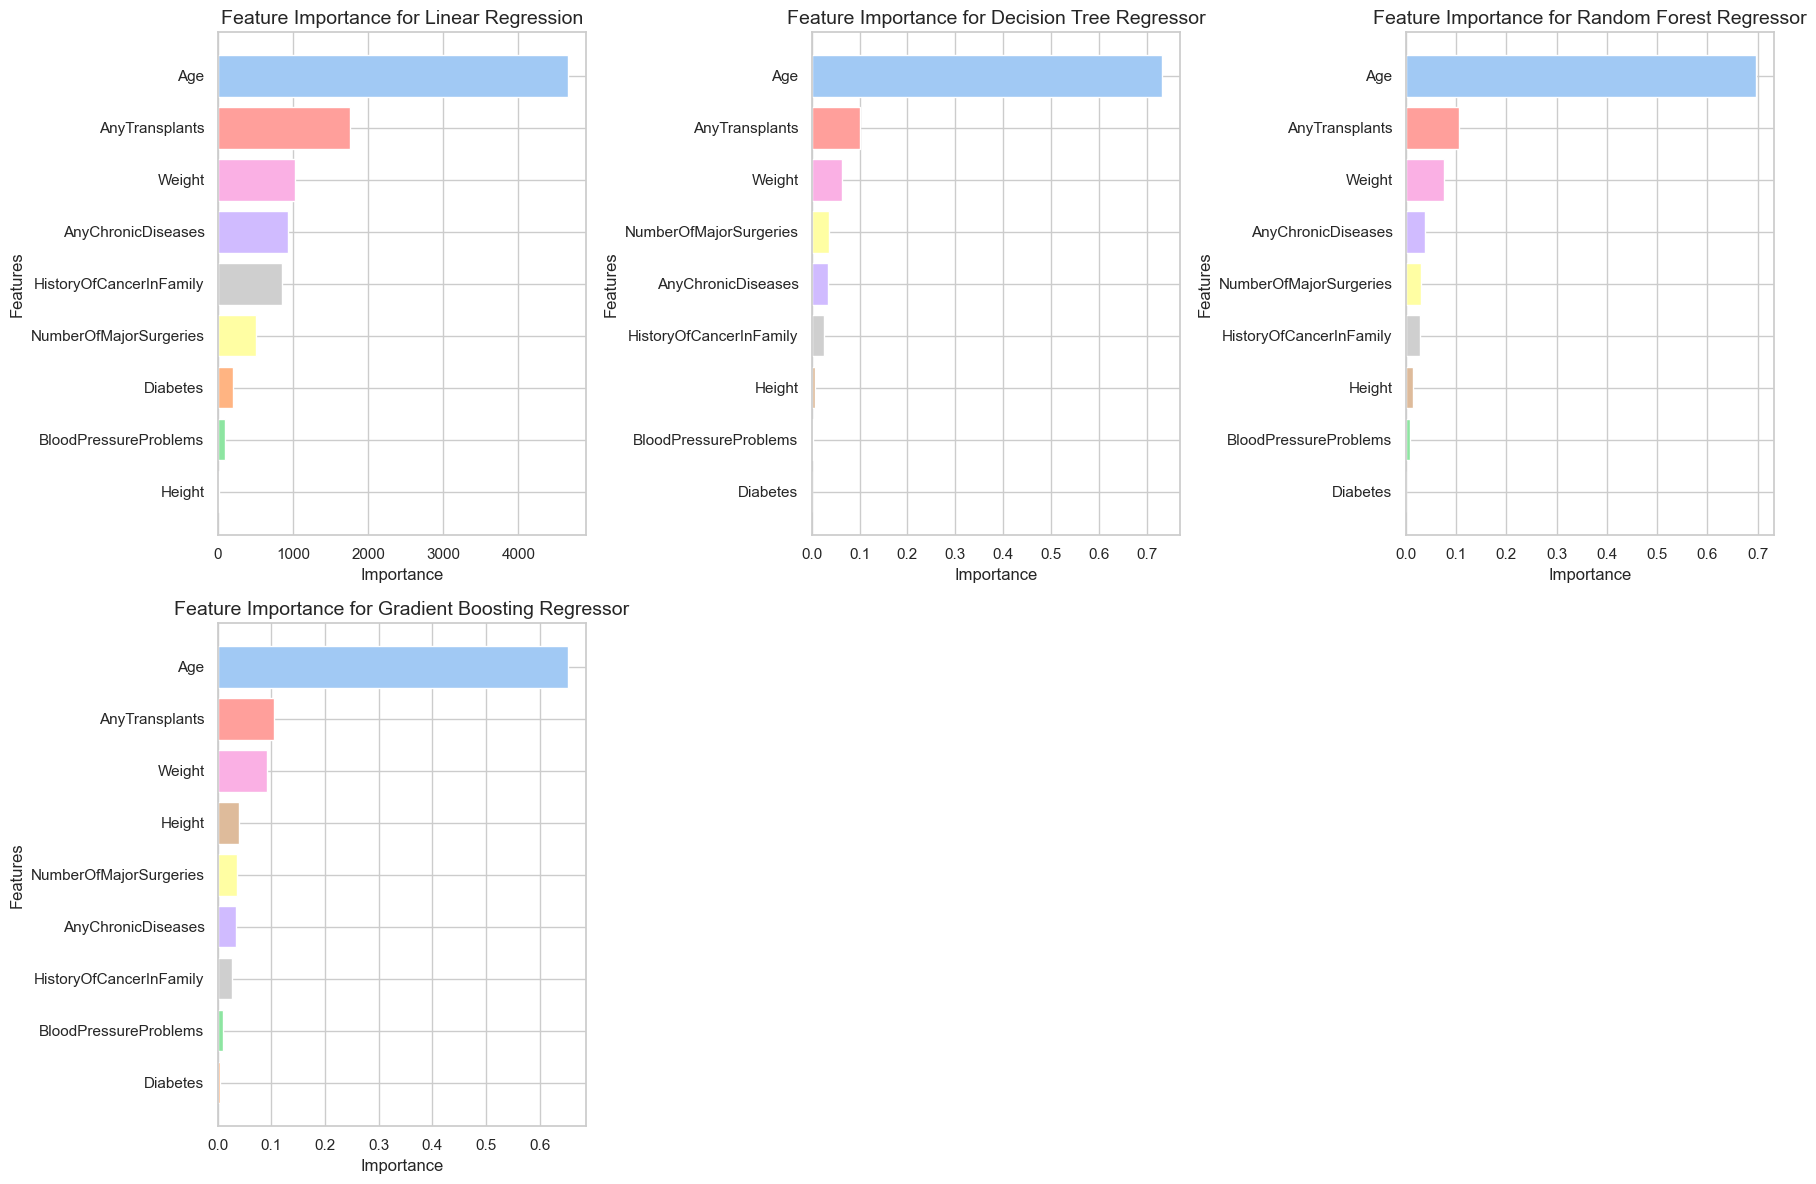

In [201]:
model_name = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]
model_object = [lrmodel, dt_best, best_rf_model, gbr_best]

# Check if the features are named (DataFrame) or just index-based (numpy array)
features = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]

# Set a consistent color palette
colors = sns.color_palette("pastel", len(features))

# Determine the number of rows and columns based on the number of models
num_models = len(model_object)
rows = (num_models // 3) + (num_models % 3 > 0)
cols = min(num_models, 3)

# Create subplots dynamically
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))
axes = axes.flatten()

def get_importances(model, features):
    """ Helper function to retrieve feature importances or coefficients """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        importances = np.zeros(len(features))  # Default case if no importances/coefficients are found
    return importances

# Loop through models and plot their feature importances
for i, (name, model) in enumerate(zip(model_name, model_object)):
    ax = axes[i]
    importances = get_importances(model, features)
    
    # Sort by importance
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = np.array(features)[sorted_idx]
    sorted_importances = importances[sorted_idx]
    
    # Plotting
    ax.barh(sorted_features, sorted_importances, color=[colors[j] for j in sorted_idx])
    ax.set_title(f"Feature Importance for {name}", fontsize=14)
    ax.set_xlabel("Importance", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    ax.invert_yaxis()  # Reverse the y-axis for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Tight layout for neat spacing
plt.tight_layout()
plt.show()

<h3>Insights:</h3>
In all the models, Age is the feature having most relevance on predicting Premium Price, followed by Any Transplants and BMI (Height, Weight combination)

<h3>Comparing with Actuals: </h3>

In [202]:

df_compare = pd.DataFrame({'Actual':y_test,'Linreg':y_pred_lrmodel, 'poly_lr':y_pred_polylrmodel,
                  'dt':y_test_pred_dt,'rf':y_pred_rfmodel,'gr':y_pred_gbrmodel})
df_compare

Actual        Linreg  poly_lr            dt            rf            gr
551   28000  28295.103274  28554.0  28000.000000  28000.000000  27844.245637
326   23000  25779.280626  25905.0  24875.000000  23779.415362  24092.544696
50    23000  20297.616287  21533.0  23030.487805  23438.765352  23203.296131
307   23000  24120.234413  25083.0  22785.714286  23015.000000  23083.757490
369   38000  30428.837663  33871.0  35090.909091  34213.712898  31563.513288
..      ...           ...      ...           ...           ...           ...
610   15000  19792.055265  18472.0  22500.000000  17015.500000  16893.329907
15    23000  21020.575710  22931.0  23030.487805  23000.000000  23020.302629
805   15000  18985.317577  18649.0  15048.076923  15458.226496  15979.519634
784   29000  29339.968364  28783.0  29197.368421  28771.923077  28450.713696
518   31000  26529.593860  27609.0  30777.777778  30643.753247  30328.217284

[198 rows x 6 columns]

In [203]:
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.plot(df_compare['Actual'].iloc[0:11],label='Actual')
plt.plot(df_compare['Linreg'].iloc[0:11],label="Linreg")
plt.legend()

plt.subplot(232)
plt.plot(df_compare['Actual'].iloc[0:11],label='Actual')
plt.plot(df_compare['poly_lr'].iloc[0:11],label="poly_lr")
plt.legend()

plt.subplot(233)
plt.plot(df_compare['Actual'].iloc[0:11],label='Actual')
plt.plot(df_compare['dt'].iloc[0:11],label="dt")
plt.legend()


plt.subplot(234)
plt.plot(df_compare['Actual'].iloc[0:11],label='Actual')
plt.plot(df_compare['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(235)
plt.plot(df_compare['Actual'].iloc[0:11],label='Actual')
plt.plot(df_compare['gr'].iloc[0:11],label="gbr")
plt.legend()

plt.tight_layout()
plt.legend()

In [204]:
#Creating a dataframe of all results:

metrics_lr_train = performance_metrics(y_train, lrmodel.predict(x_train_scaled), x_train_scaled.shape[1])
metrics_lr_test = performance_metrics(y_test, lrmodel.predict(x_test_scaled), x_test_scaled.shape[1])

metrics_poly_lr_train = performance_metrics(y_train, linreg_poly.predict(x_train_poly), x_train_poly.shape[1])
metrics_poly_lr_test = performance_metrics(y_test, linreg_poly.predict(x_test_poly), x_test_poly.shape[1])

metrics_dt_train = performance_metrics(y_train, dt_best.predict(x_train), x_train.shape[1])
metrics_dt_test = performance_metrics(y_test, dt_best.predict(x_test), x_test.shape[1])

metrics_rf_train = performance_metrics(y_train, best_rf_model.predict(x_train), x_train.shape[1])
metrics_rf_test = performance_metrics(y_test, best_rf_model.predict(x_test), x_test.shape[1])

metrics_gbr_train = performance_metrics(y_train, gbr_best.predict(x_train), x_train.shape[1])
metrics_gbr_test = performance_metrics(y_test, gbr_best.predict(x_test), x_test.shape[1])

# Store the metrics for each model in a list
model_metrics = [
    {'Model': 'Linear Regression', 'Data Type': 'Train', **metrics_lr_train},
    {'Model': 'Linear Regression', 'Data Type': 'Test', **metrics_lr_test},
    {'Model': 'Polynomial Regression', 'Data Type': 'Train', **metrics_poly_lr_train},
    {'Model': 'Polynomial Regression', 'Data Type': 'Test', **metrics_poly_lr_test},
    {'Model': 'Decision Tree', 'Data Type': 'Train', **metrics_dt_train},
    {'Model': 'Decision Tree', 'Data Type': 'Test', **metrics_dt_test},
    {'Model': 'Random Forest', 'Data Type': 'Train', **metrics_rf_train},
    {'Model': 'Random Forest', 'Data Type': 'Test', **metrics_rf_test},
    {'Model': 'Gradient Boosting', 'Data Type': 'Train', **metrics_gbr_train},
    {'Model': 'Gradient Boosting', 'Data Type': 'Test', **metrics_gbr_test}
]

# Create a DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display the DataFrame
df_metrics

Model Data Type    R2  Adjusted R2  Mean Squared Error  \
0      Linear Regression     Train  0.65         0.65         13771841.22   
1      Linear Regression      Test  0.61         0.59         14830485.48   
2  Polynomial Regression     Train  0.74         0.72         10401540.98   
3  Polynomial Regression      Test  0.68         0.56         12136519.11   
4          Decision Tree     Train  0.86         0.86          5457694.77   
5          Decision Tree      Test  0.78         0.77          8271926.85   
6          Random Forest     Train  0.89         0.89          4341570.84   
7          Random Forest      Test  0.81         0.80          7181952.68   
8      Gradient Boosting     Train  0.94         0.94          2207915.33   
9      Gradient Boosting      Test  0.81         0.80          7286226.25   

   Root Mean Squared Error  Mean Absolute Percentage Error  
0                  3711.04                            0.11  
1                  3851.04                            0.11  
2                  3225.14                            0.10  
3                  3483.75                            0.09  
4                  2336.17                            0.03  
5                  2876.10                            0.04  
6                  2083.64                            0.03  
7                  2679.92                            0.04  
8                  1485.91                            0.03  
9                  2699.30                            0.05

In [206]:
test_data = df_metrics[df_metrics['Data Type'] == 'Test']

# Create a 2x2 grid to plot R², RMSE, and MAPE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot R² score
sns.barplot(x='Model', y='R2', data=test_data, hue='Model', ax=axes[0])
axes[0].set_title('R² Score for Test Data')
axes[0].set_ylabel('R²')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot RMSE
sns.barplot(x='Model', y='Root Mean Squared Error', data=test_data, hue='Model', ax=axes[1])
axes[1].set_title('RMSE for Test Data')
axes[1].set_ylabel('RMSE')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Plot MAPE
sns.barplot(x='Model', y='Mean Absolute Percentage Error', data=test_data, hue='Model', ax=axes[2])
axes[2].set_title('MAPE for Test Data')
axes[2].set_ylabel('MAPE')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<h3>Insights:</h3>
As we can see above, R2 square score for Random Forest and Gradient Boosting is better than other models. RMSE and MAPE however are lesser for Random Forest model comparing other models, including Decision Tree model --> This concludes Random Forest is a better model for this insurance premium price prediction. 

<h2>Insights and Recommendations:</h2>

<h2>Insights:</h2>

- Age affects the prediction of Premium Price the most as per the analysis.
- A person having a known health condition will most likely have to pay more premium price than others having no health condition.
- Transplants are also an important factor in determining the premium price.
- If a person's BMI is not normal, they will be paying a comparatively higher premium.
- As analysed, as the age increases, risk of getting serious health conditions also increase which in turn increases the premium price.
- We have identified Random Forest Regressor model to be the most fit model to be able to predict with higher performace than other models, with approximately 81% R2 score. 

<h2>Recommendations:</h2>

- Create tiers in Premium Pricing like low risk, mid risk and high risk tiers. Low risk individuals will pay a set nominal premium price than other two categories. Mid Risk individuals will be paying some additional amount to accomodate unknown health conditions risks, and high risk individuals who migh have serious conditions will be paying a comparatively large premium price to ensure they are properly covered.
- Dynamic Pricing Models: Implement dynamic pricing models based on real-time data and risk factors (e.g., driving behavior, health metrics, or property risk assessments). This helps in creating more accurate premiums and attracting customers who are willing to pay for personalized coverage.
- Offer discounts and attract low risk individuals into buying premium at lower price.
- Since all health conditions except known allergies affect premium price, conduct events and wellness progams, podcasts to educate people on maintaining good health overall to avoid any mishaps.
- Improve risk assessments, predict claims, and optimize pricing. This will allow for more personalized premiums and better risk mitigation.
- Personalization: Use data analytics to understand customer needs and preferences better. Offer personalized insurance products (e.g., coverage options, discounts) based on the customer’s life stage, risk profile, and preferences.
- Reinsurance and Risk Pools: Optimize reinsurance strategies by leveraging data to assess and mitigate risks better. Pooling risks with other insurers or reinsurers can help in managing large-scale events.
- Loyalty Programs: Create customer loyalty programs to reward long-term clients with discounts, bonuses, or rewards for low-risk behavior (e.g., no claims)